# Tec de Distribuição de dados

## Tipos de distribuição Naive Bayes.

### importações

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Naive bayes bernoulli

* Esse modelo é recomendado em distribuições binarias

In [5]:
dataset = pd.read_csv('census.csv')

* Exemplo de aplicação e performance, prevendo o salario com a variavel sex 

In [6]:
dataset['income'].unique(), dataset['sex'].unique()

(array([' <=50K', ' >50K'], dtype=object),
 array([' Male', ' Female'], dtype=object))

In [7]:
X = dataset['sex'].values
X

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [8]:
y = dataset['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X)
X = label_encoder.transform(X)

In [10]:
X, np.unique(X)

(array([1, 1, 1, ..., 0, 1, 0]), array([0, 1]))

In [11]:
X = X.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


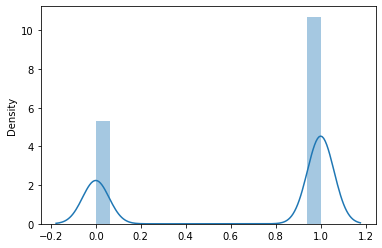

In [12]:
sns.distplot(X)



> **NOTA:** A distribuição de Bernoulli é uma distribuição discreta que consiste em apenas um estudo com 2 resultados (sucesso / fracasso). Constitui a base para definir outras distribuições mais complexas.



In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [14]:
bernoulli_naive_bayes = BernoulliNB()
bernoulli_naive_bayes.fit(X, y);

In [15]:
previsoes = bernoulli_naive_bayes.predict(X)

In [16]:
accuracy_score(y, previsoes)

0.7591904425539756

### Naive bayes multinomial

> **NOTA:** A distribuição multinomial é uma distribuição que consiste em multi-valores categoricos.

In [17]:
dataset.head(n=1)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [18]:
from sklearn import preprocessing
label_encoder0 = preprocessing.LabelEncoder()
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
label_encoder4 = preprocessing.LabelEncoder()
label_encoder5 = preprocessing.LabelEncoder()
label_encoder6 = preprocessing.LabelEncoder()

In [19]:
dataset['workclass'] = label_encoder0.fit_transform(dataset['workclass'])
dataset['education'] = label_encoder1.fit_transform(dataset['education'])
dataset['marital-status'] = label_encoder2.fit_transform(dataset['marital-status'])
dataset['occupation'] = label_encoder3.fit_transform(dataset['occupation'])
dataset['relationship'] = label_encoder4.fit_transform(dataset['relationship'])
dataset['race'] = label_encoder5.fit_transform(dataset['race'])
dataset['native-country'] = label_encoder6.fit_transform(dataset['native-country'])

In [20]:
dataset.head(n=1)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K


In [21]:
X = dataset.iloc[:, [1,3,5,6,7,8,13]].values
X

array([[ 7,  9,  4, ...,  1,  4, 39],
       [ 6,  9,  2, ...,  0,  4, 39],
       [ 4, 11,  0, ...,  1,  4, 39],
       ...,
       [ 4, 11,  6, ...,  4,  4, 39],
       [ 4, 11,  4, ...,  3,  4, 39],
       [ 5, 11,  2, ...,  5,  4, 39]])

In [22]:
y = dataset['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [23]:
from sklearn.naive_bayes import MultinomialNB

multinomial_naive_bayes = MultinomialNB()
multinomial_naive_bayes.fit(X, y);

In [24]:
previsoes = multinomial_naive_bayes.predict(X)

In [25]:
accuracy_score(y, previsoes)

0.7485949448727005

## Algoritmo K-NN (distribuição desbalanceada)

KNN(K — Nearest Neighbors) é um algoritmo ( de aprendizagem supervisionada ) usado no campo de machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado do outro. quanto mais proximo for suas similaridades, maior performance o algoritmo terá.

In [26]:
credit = pd.read_csv('credit_data.csv')
credit.dropna(inplace=True)
credit.head(n=1)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0


### (Distribuição desbalanceada)

In [27]:
X = credit.iloc[:, 1:4].values

In [28]:
y = credit['c#default'].values

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2,
                                                                 stratify=y)

* Coluna income - Salario

In [31]:
np.mean(X_treinamento[0]), np.median(X_treinamento[0]), np.std(X_treinamento[0])

(20512.634263477314, 9255.842933769847, 22743.255890012195)

In [32]:
np.mean(X_teste[0]), np.median(X_teste[0]), np.std(X_teste[0])

(8301.694674837721, 1419.80552276132, 10727.006911741324)

* Treinamento K-NN

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_treinamento, y_treinamento);

In [34]:
previsoes = knn.predict(X_teste)

In [35]:
accuracy_score(y_teste, previsoes)

0.8425

### (Distribuição padronizada)

* Padronização dos dados aumentando a linha de similaridade.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
z_score_treinamento = StandardScaler()
z_score_teste = StandardScaler()

In [38]:
X_treinamento_p = z_score_treinamento.fit_transform(X_treinamento)
X_teste_p = z_score_teste.fit_transform(X_teste)

In [39]:
X_treinamento_p, X_teste_p

(array([[ 0.48519919,  0.52505727,  1.55017576],
        [-1.16452634,  1.01298035, -0.82842976],
        [ 0.82788292, -1.33834385,  1.86082611],
        ...,
        [-0.87324986,  0.29956857,  0.50408912],
        [ 1.57975608,  0.51038797,  0.36509738],
        [ 0.20135905,  1.07343471, -0.80678594]]),
 array([[-1.50605061, -0.50683703, -0.98313677],
        [ 0.63018589, -0.76234384, -0.49298565],
        [ 1.36713326, -0.9532931 , -0.08693828],
        ...,
        [ 0.26981474,  0.20102913, -0.59533931],
        [ 0.26699516, -0.28818893,  0.09980171],
        [-1.49491008, -0.65520052, -0.62293095]]))

* coluna income - Salario

In [40]:
np.mean(X_treinamento_p[0]), np.median(X_treinamento_p[0]), np.std(X_treinamento_p[0])

(0.853477410180528, 0.5250572727202202, 0.4929087905458293)

In [41]:
np.mean(X_teste_p[0]), np.median(X_teste_p[0]), np.std(X_teste_p[0])

(-0.998674801853725, -0.983136765194076, 0.40807516914168357)

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_treinamento_p, y_treinamento);

In [43]:
previsoes = knn.predict(X_teste_p)

In [44]:
accuracy_score(y_teste, previsoes)

0.975

## Regressão Linear


* Exemplo de regressão linear para prever o preço de casas utilizando a variavel metrica de espaço

In [49]:
df_house = pd.read_csv('house_prices.csv')

In [50]:
df_house.head(n=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


* coluna (sqft_living) - metragem da casa

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


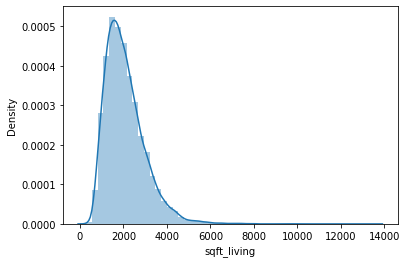

In [53]:
sns.distplot(df_house['sqft_living'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


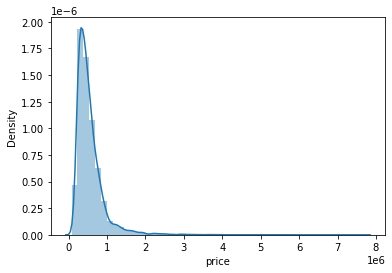

In [54]:
sns.distplot(df_house['price'])

### distribuição enviesada (Sem tratamento)

In [55]:
from sklearn.linear_model import LinearRegression

X = df_house['sqft_living'].values
X

array([1180, 2570,  770, ..., 1020, 1600, 1020])

In [60]:
X.shape

(21613, 1)

In [59]:
X = X.reshape(-1,1)

In [62]:
y = df_house['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [64]:
regressor = LinearRegression()
regressor.fit(X, y);

In [65]:
previsoes = regressor.predict(X)

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score 

In [68]:
mean_absolute_error(y, previsoes)

173688.2733595311

In [69]:
r2_score(y, previsoes)

0.4928532179037931

### distribuição enviesada (tratamento)



> **NOTA:** O exemplo é aplicado em regressão linear simples, apenas para fins didaticos de tratamento em distribuições enviesadas, e logo, pensando em resultado de perfomance, deve-se ser usado mais variaveis para aumentar o desempenho desse algoritmo (O que não é o foco do momento).



In [70]:
X_novo = np.log(X)
X_novo

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

In [71]:
y_novo = np.log(y)
y_novo

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


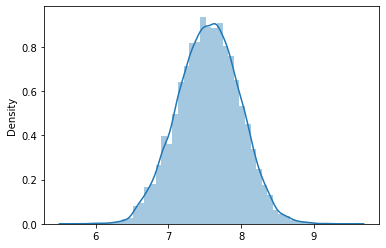

In [73]:
sns.distplot(X_novo)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


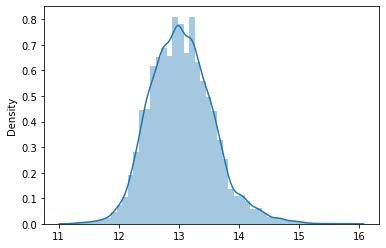

In [72]:
sns.distplot(y_novo)

In [74]:
regressor = LinearRegression()
regressor.fit(X_novo, y_novo);

In [75]:
previsoes = regressor.predict(X_novo)

In [78]:
mean_absolute_error(y_novo, previsoes)

0.314671784942507

In [79]:
r2_score(y_novo, previsoes)

0.45550706431577015